In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
from app.data_processor import DataProcessor

nvda_dp = DataProcessor(tick="NVDA", company_name="Nvidia")
nvda_df = nvda_dp.debug()
nvda_df

/Users/anakin./Projects/2025/Finance_Sentiment_Analyse/Finance_Sentiment_Analyser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/anakin./Projects/2025/Finance_Sentiment_Analyse/Finance_Sentiment_Analyser/app/data_scrapper.py:24: FutureWarning: Parsing 'GMT' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df["Date"] = pd.to_datetime(df["Date"])


Processing 0/100 batch...
Processing 20/100 batch...
Processing 40/100 batch...
Processing 60/100 batch...
Processing 80/100 batch...


,Date,STM Score,is_weekday,Close,Daily_return (%)
0,2025-10-02,0.00,1.0,188.89,0.88
1,2025-10-03,-0.09,1.0,187.62,-0.67
2,2025-10-06,0.00,1.0,185.54,-1.11
3,2025-10-07,0.15,1.0,185.04,-0.27
4,2025-10-08,0.16,1.0,189.11,2.20
5,2025-10-09,0.31,1.0,192.57,1.83


In [3]:
def normalise_cols(df:pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["normalised_STM_Score"] = zscore(df["STM Score"]).round(2)
    df["normalised_Daily_return"] = zscore(df["Daily_return (%)"]).round(2)
    return df
    
df = normalise_cols(df=nvda_df)

In [4]:
df

,Date,STM Score,is_weekday,Close,Daily_return (%),normalised_STM_Score,normalised_Daily_return
0,2025-10-02,0.00,1.0,188.89,0.88,-0.67,0.32
1,2025-10-03,-0.09,1.0,187.62,-0.67,-1.34,-0.92
2,2025-10-06,0.00,1.0,185.54,-1.11,-0.67,-1.27
3,2025-10-07,0.15,1.0,185.04,-0.27,0.47,-0.60
4,2025-10-08,0.16,1.0,189.11,2.20,0.54,1.38
5,2025-10-09,0.31,1.0,192.57,1.83,1.67,1.08


In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

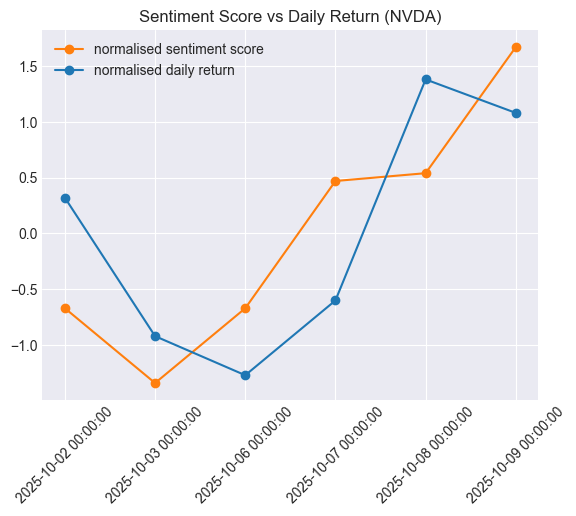

In [6]:
def plot_time_series(tick: str):
    plt.style.use("seaborn-v0_8-darkgrid")
    
    fig, ax = plt.subplots()
    x = df.index
    date = df["Date"]
    stm_score = df["normalised_STM_Score"]
    daily_return = df["normalised_Daily_return"]

    ax.plot(x, stm_score, color="tab:orange", marker="o", label="normalised sentiment score")
    ax.plot(x, daily_return, color="tab:blue", marker="o", label="normalised daily return")

    ax.set_title(f"Sentiment Score vs Daily Return ({tick})")

    # plt.axhline(y=0, color='black', linewidth=1)
    ax.set_xticks(df.index)
    ax.set_xticklabels(date)
    ax.tick_params(axis="x", labelrotation=45)
    ax.legend()
    ax.plot()
    
plot_time_series(tick="NVDA")

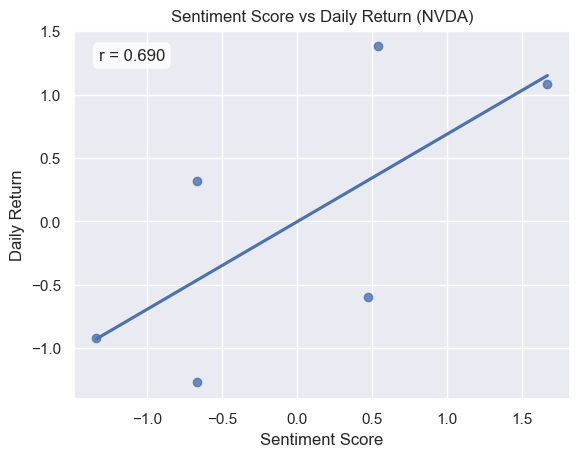

In [7]:
def plot_scatter(tick):
    sns.set_theme()
    
    fig, ax = plt.subplots()
    
    x = df.index
    date = df["Date"]
    stm_score = df["normalised_STM_Score"]
    daily_return = df["normalised_Daily_return"]
    corr, p_val = pearsonr(stm_score,daily_return)
    
    sns.regplot(x=stm_score, y=daily_return, ax=ax, ci=None)
    
    ax.text(0.05, 0.95, f'r = {corr:.3f}', 
        transform=ax.transAxes, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f"Sentiment Score vs Daily Return ({tick})")
    ax.set_ylabel("Daily Return")
    ax.set_xlabel("Sentiment Score")
    ax.plot()
    
plot_scatter(tick="NVDA")

    

In [8]:
df

,Date,STM Score,is_weekday,Close,Daily_return (%),normalised_STM_Score,normalised_Daily_return
0,2025-10-02,0.00,1.0,188.89,0.88,-0.67,0.32
1,2025-10-03,-0.09,1.0,187.62,-0.67,-1.34,-0.92
2,2025-10-06,0.00,1.0,185.54,-1.11,-0.67,-1.27
3,2025-10-07,0.15,1.0,185.04,-0.27,0.47,-0.60
4,2025-10-08,0.16,1.0,189.11,2.20,0.54,1.38
5,2025-10-09,0.31,1.0,192.57,1.83,1.67,1.08


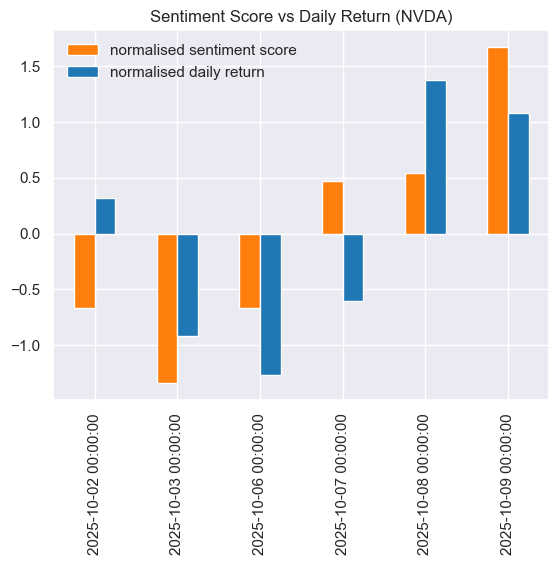

In [9]:
def plot_bar_charts(tick):
    fig, ax = plt.subplots()
    
    df[["normalised_STM_Score", "normalised_Daily_return"]].plot(kind="bar", ax=ax, color=["tab:orange", "tab:blue"])
    
    ax.set_title(f"Sentiment Score vs Daily Return ({tick})")
    ax.legend(["normalised sentiment score", "normalised daily return"])
    
    ax.plot()
    ax.set_xticklabels(df["Date"])
    
plot_bar_charts(tick="NVDA")